In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
Data = pd.read_csv("customer_churn.csv")

In [36]:
Data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [39]:
Data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [15]:
inputData = Data[['tenure', 'SeniorCitizen','MonthlyCharges']]

In [26]:
target=Data[["Churn"]]

In [44]:
inputData.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [46]:
contract_dict = {'Month-to-month':1, 'One year':2, 'Two year':3}
Data['Contract'] = Data['Contract'].map(contract_dict)

In [56]:
def change_partner (x):
    if x== "Yes":
        x=1
    else:
        x=0
    return x

In [57]:
Data['Partner']=list(map(change_partner, Data['Partner']))

In [58]:
inputData = Data[['tenure', 'SeniorCitizen','MonthlyCharges',"Partner","Contract"]]

In [62]:
inputData.shape

(7043, 5)

In [61]:
target.shape

(7043, 1)

In [ ]:
Data=change_partner(Data)

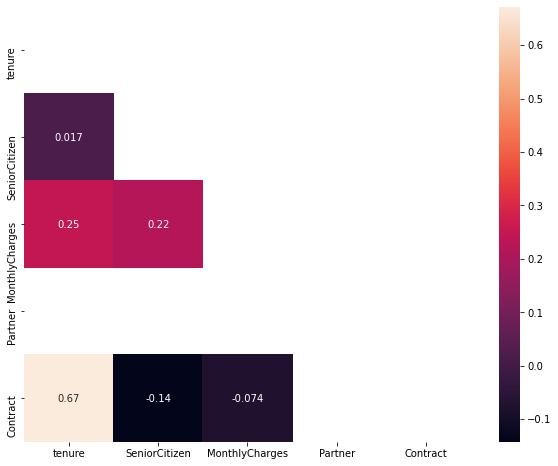

In [63]:
correlations_matrix = inputData.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [69]:
inputData.describe()

,tenure,SeniorCitizen,MonthlyCharges,Partner,Contract
count,7043.000000,7043.000000,7043.000000,7043.0,7043.000000
mean,32.371149,0.162147,64.761692,0.0,1.690473
std,24.559481,0.368612,30.090047,0.0,0.833755
min,0.000000,0.000000,18.250000,0.0,1.000000
25%,9.000000,0.000000,35.500000,0.0,1.000000
50%,29.000000,0.000000,70.350000,0.0,1.000000
75%,55.000000,0.000000,89.850000,0.0,2.000000
max,72.000000,1.000000,118.750000,0.0,3.000000


## standart scaler

In [65]:

transformer = StandardScaler().fit(inputData)
scaled_x = transformer.transform(inputData)

In [67]:
pd.DataFrame(scaled_x).head()

,0,1,2,3,4
0,-1.277445,-0.439916,-1.160323,0.0,-0.828207
1,0.066327,-0.439916,-0.259629,0.0,0.371271
2,-1.236724,-0.439916,-0.362660,0.0,-0.828207
3,0.514251,-0.439916,-0.746535,0.0,0.371271
4,-1.236724,-0.439916,0.197365,0.0,-0.828207


## first try without balancing anything

In [73]:
Y= target

In [71]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, target)
                        
print("The accuracy of the model is: ",round(classification.score(scaled_x, target),2))


The accuracy of the model is:  0.79


In [72]:
print("The kappa of the model is: ",round(cohen_kappa_score(target,classification.predict(scaled_x)),2))

The kappa of the model is:  0.43


## Downsampeling 

In [77]:

rus = RandomUnderSampler()


X_rus, y_rus = rus.fit_sample(scaled_x, Y)

In [82]:
pd.DataFrame(y_rus).value_counts()

Churn
Yes      1869
No       1869
dtype: int64

In [84]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_rus, y_rus)
                        
print("The accuracy of the model is: ",round(classification.score(X_rus, y_rus),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_rus,classification.predict(X_rus)),2))

The accuracy of the model is:  0.76
The kappa of the model is:  0.51


## oversampling

In [86]:
ros = RandomOverSampler()

In [87]:
X_ros, y_ros = ros.fit_sample(scaled_x, Y)

In [88]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_ros, y_ros)
                        
print("The accuracy of the model is: ",round(classification.score(X_ros, y_ros),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_ros,classification.predict(X_ros)),2))

The accuracy of the model is:  0.76
The kappa of the model is:  0.51


In [89]:
y_ros.value_counts()

Churn
Yes      5174
No       5174
dtype: int64

## SMOT

In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_sample(scaled_x, Y)
pd.DataFrame(y_sm).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [104]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)
                        
print("The accuracy of the model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

The accuracy of the model is:  0.75
The kappa of the model is:  0.51


## Tomek

In [105]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')

X_tl, y_tl = tl.fit_sample(scaled_x, Y)
pd.DataFrame(y_tl).value_counts()

Churn
No       4679
Yes      1869
dtype: int64

In [107]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)
                        
print("The accuracy of the model is: ",round(classification.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,classification.predict(X_tl)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.47


# Trying with smot after tomek

In [109]:
X_sm1, y_sm1 = smote.fit_sample(X_tl,y_tl)
pd.DataFrame(y_sm1).value_counts()

Churn
Yes      4679
No       4679
dtype: int64

In [111]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm1, y_sm1)
                        
print("The accuracy of the model is: ",round(classification.score(X_sm1, y_sm1),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm1,classification.predict(X_sm1)),2))

The accuracy of the model is:  0.77
The kappa of the model is:  0.55


In [92]:
df=pd.concat([pd.DataFrame(X_ros),pd.DataFrame(y_ros)],axis=1)
df.columns =['tenure', 'SeniorCitizen','MonthlyCharges',"Partner","Contract","Churn"]

In [93]:
df.head()

,0,1,2,3,4,Churn
0,-1.277445,-0.439916,-1.160323,0.0,-0.828207,No
1,0.066327,-0.439916,-0.259629,0.0,0.371271,No
2,-1.236724,-0.439916,-0.362660,0.0,-0.828207,Yes
3,0.514251,-0.439916,-0.746535,0.0,0.371271,No
4,-1.236724,-0.439916,0.197365,0.0,-0.828207,Yes


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      Churn
0       No
1       No
2      Yes
3       No
4      Yes
...    ...
7038    No
7039    No
7040    No
7041   Yes
7042    No

[7043 rows x 1 columns]

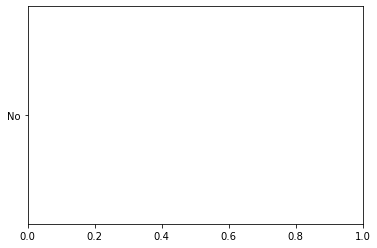

In [102]:
plt.scatter(df["MonthlyCharges"],df["Churn"],c= Y)
plt.show()